In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('flights')

In [4]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))

In [6]:
df.set_index('yearMonth', inplace=True)

<Axes: xlabel='yearMonth', ylabel='passengers'>

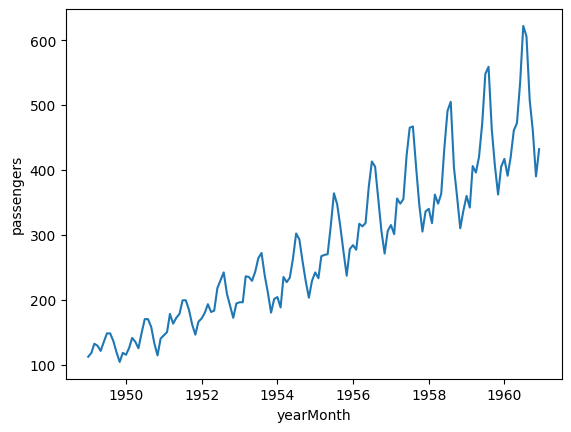

In [7]:
sns.lineplot(data = df, x = df.index, y = df.passengers)

In [8]:
def test_stationarity(dataFrame, var):
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()

  from statsmodels.tsa.stattools import adfuller
  adfTest = adfuller(dataFrame[var], autolag='AIC')
  stats = pd.Series(adfTest[0:4], index=["Test Statistic", "p-value", "#lags used", "number of observations used"])
  print(stats)

  for key, values in adfTest[4].items():
    print('criticality ', key, " :", values)

  sns.lineplot(data = dataFrame, x = dataFrame.index, y = var)
  sns.lineplot(data = dataFrame, x = dataFrame.index, y = 'rollMean')
  sns.lineplot(data = dataFrame, x = dataFrame.index, y = 'rollStd')

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality  1%  : -3.4816817173418295
criticality  5%  : -2.8840418343195267
criticality  10%  : -2.578770059171598


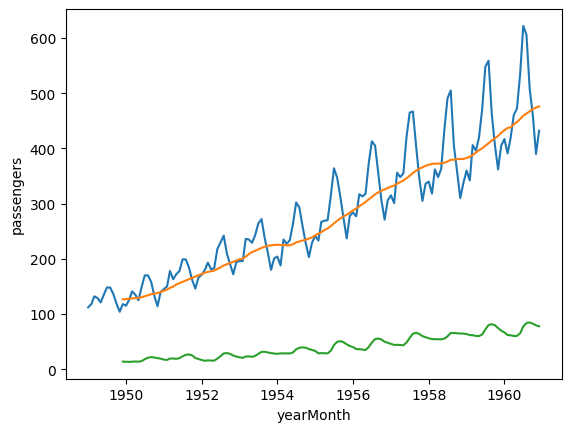

In [9]:
test_stationarity(df, 'passengers')

In [10]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
# time shift

air_df['shift'] = air_df.passengers.shift()
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head()

<ipython-input-11-726792828145>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.passengers.shift()
<ipython-input-11-726792828145>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']


,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


<ipython-input-8-371e73d62103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
<ipython-input-8-371e73d62103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality  1%  : -3.4816817173418295
criticality  5%  : -2.8840418343195267
criticality  10%  : -2.578770059171598


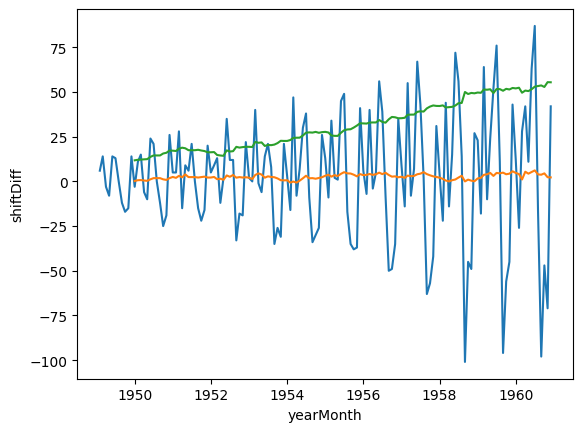

In [12]:
test_stationarity(air_df.dropna(),'shiftDiff')

In [13]:
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

<ipython-input-13-0a5c8cae16ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


<ipython-input-8-371e73d62103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
<ipython-input-8-371e73d62103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality  1%  : -3.4816817173418295
criticality  5%  : -2.8840418343195267
criticality  10%  : -2.578770059171598


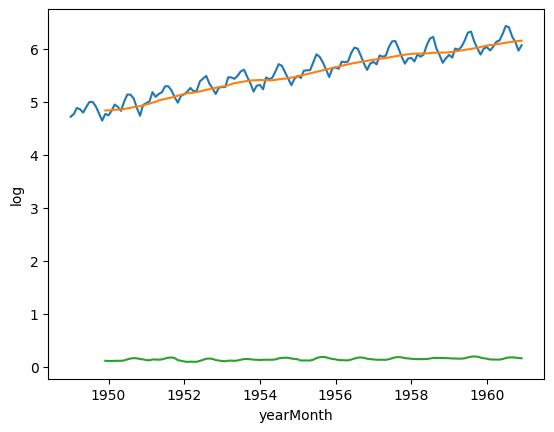

In [14]:
test_stationarity(log_df, 'log')

In [15]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

<ipython-input-15-8dec05d3c5a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['passengers'])


,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


<ipython-input-8-371e73d62103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
<ipython-input-8-371e73d62103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality  1%  : -3.4816817173418295
criticality  5%  : -2.8840418343195267
criticality  10%  : -2.578770059171598


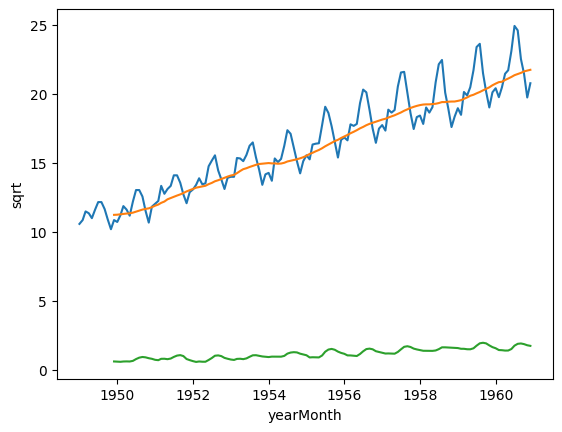

In [16]:
test_stationarity(sqrt_df,'sqrt')

In [17]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()

<ipython-input-17-179395173d25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])


,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


<ipython-input-8-371e73d62103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
<ipython-input-8-371e73d62103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality  1%  : -3.4816817173418295
criticality  5%  : -2.8840418343195267
criticality  10%  : -2.578770059171598


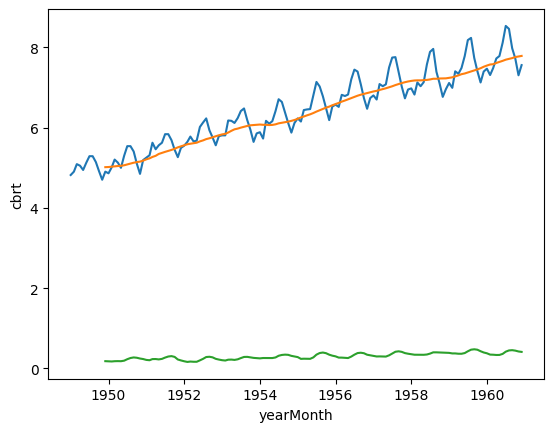

In [18]:
test_stationarity(cbrt_df,'cbrt')

In [19]:
log_df2 = log_df[['passengers','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

<ipython-input-19-9f9f19f6e8e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,passengers,log,log_sqrt,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


<ipython-input-8-371e73d62103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
<ipython-input-8-371e73d62103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.611019
p-value                          0.090741
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality  1%  : -3.4825006939887997
criticality  5%  : -2.884397984161377
criticality  10%  : -2.578960197753906


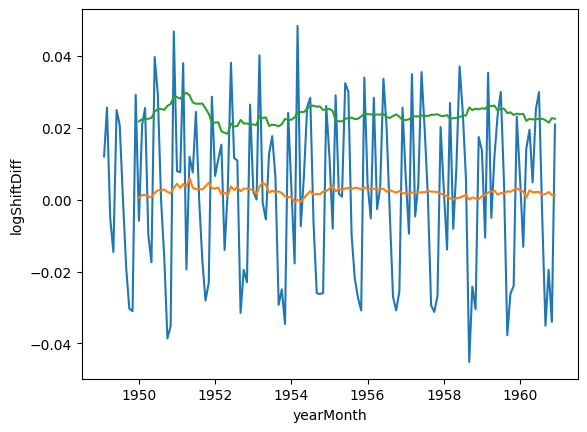

In [20]:
test_stationarity(log_df2.dropna(),'logShiftDiff')

In [21]:
log_shift = df[['passengers']].copy(deep=True)
log_shift['log'] = np.log(log_shift['passengers'])
log_shift['logShift'] = log_shift['log'].shift()
log_shift['logShiftDiff'] = log_shift['log'] - log_shift['logShift']
log_shift.head()

,passengers,log,logShift,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,NaN,NaN
1949-02-01,118,4.770685,4.718499,0.052186
1949-03-01,132,4.882802,4.770685,0.112117
1949-04-01,129,4.859812,4.882802,-0.022990
1949-05-01,121,4.795791,4.859812,-0.064022


<ipython-input-8-371e73d62103>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
<ipython-input-8-371e73d62103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


Test Statistic                  -2.717131
p-value                          0.071121
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality  1%  : -3.4825006939887997
criticality  5%  : -2.884397984161377
criticality  10%  : -2.578960197753906


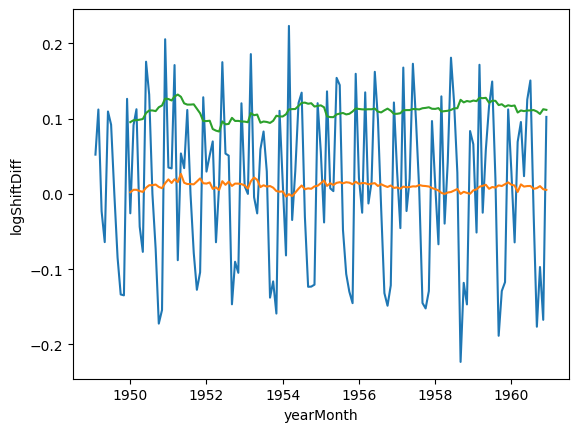

In [22]:
test_stationarity(log_shift.dropna(),'logShiftDiff')

In [23]:
airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12)

In [24]:
airP.head()


,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [31]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

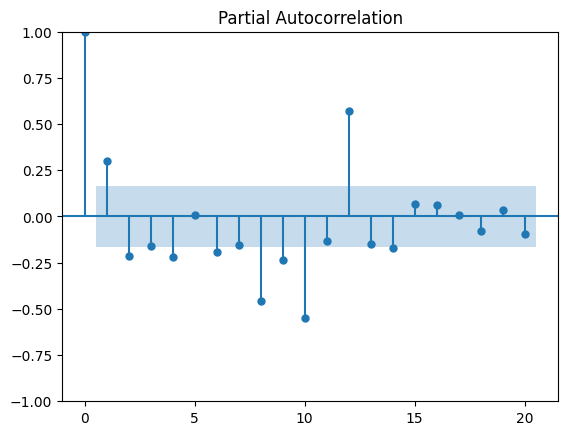

In [26]:
plot_pacf(airP['firstDiff'].dropna(),lags=20);

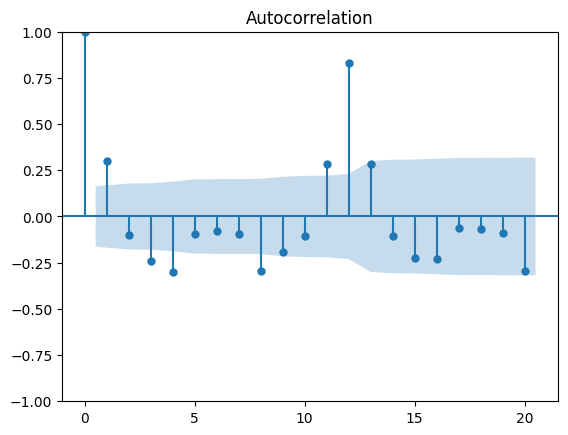

In [27]:
plot_acf(airP['firstDiff'].dropna(),lags=20);

In [28]:
train = airP[:round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100):]
test.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1957-06-01,422,67.0,48.0
1957-07-01,465,43.0,52.0
1957-08-01,467,2.0,62.0
1957-09-01,404,-63.0,49.0
1957-10-01,347,-57.0,41.0


In [32]:
model = ARIMA(train['passengers'],order=(1,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['arimaPred'] = prediction
airP.tail()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,passengers,firstDiff,Diff12,arimaPred
yearMonth,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='yearMonth', ylabel='passengers'>

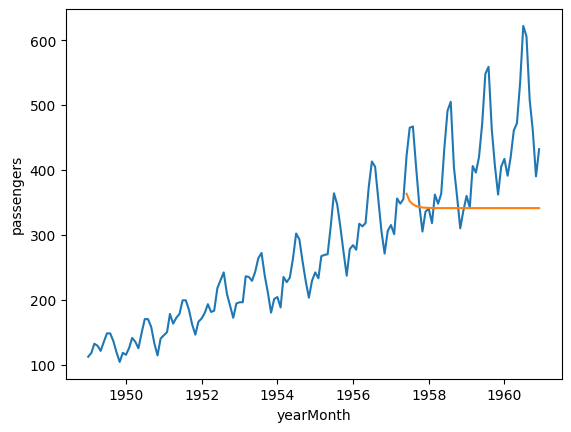

In [33]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')

In [34]:
from sklearn.metrics import mean_squared_error


In [35]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

111.1101033142743

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

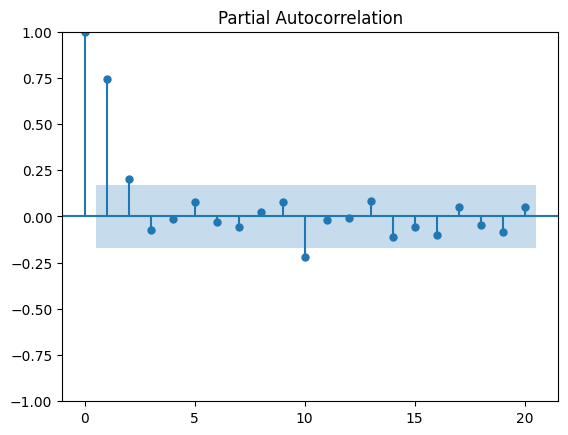

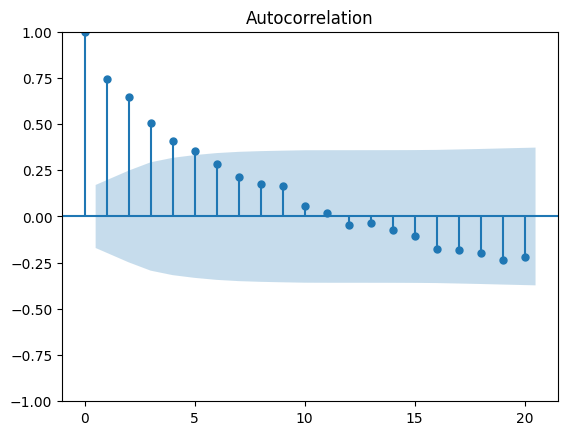

In [37]:
plot_pacf(airP['Diff12'].dropna(),lags=20);
plot_acf(airP['Diff12'].dropna(),lags=20);

In [38]:
model = SARIMAX(train['passengers'],order=(1,1,3),seasonal_order=(2,1,2,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0],end=test.index[-1])
airP['sarimaxPred'] = prediction

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='yearMonth', ylabel='passengers'>

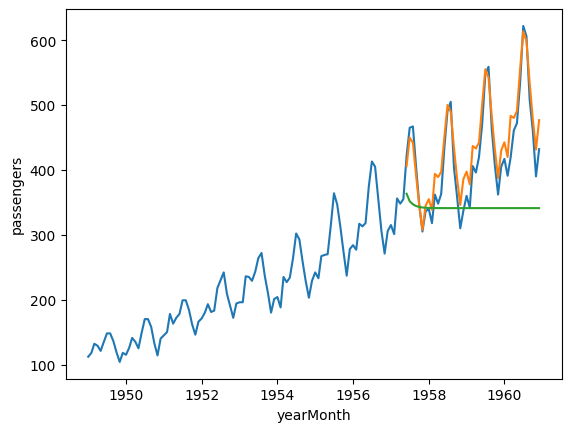

In [39]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
# model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')

In [40]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

27.475919453770423

In [41]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01',freq='MS'),columns=['Dates'])
futureDate.set_index('Dates',inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [42]:
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1])


1961-01-01    490.589402
1961-02-01    465.056862
1961-03-01    532.843397
1961-04-01    530.133489
1961-05-01    541.960109
1961-06-01    612.593540
1961-07-01    674.599932
1961-08-01    657.105554
1961-09-01    588.114077
1961-10-01    528.837213
1961-11-01    478.537050
1961-12-01    526.590439
1962-01-01    541.477575
1962-02-01    513.090033
1962-03-01    585.172404
1962-04-01    582.897588
1962-05-01    595.857510
1962-06-01    671.869247
1962-07-01    737.981041
1962-08-01    718.344171
1962-09-01    644.884477
1962-10-01    581.666671
1962-11-01    528.529539
1962-12-01    579.177906
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='yearMonth', ylabel='passengers'>

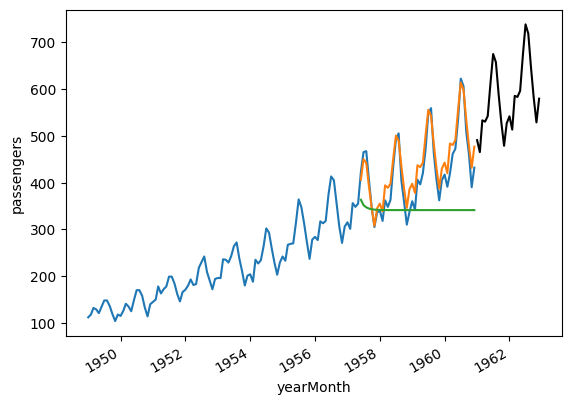

In [43]:
airP.dropna()
sns.lineplot(data=airP,x=airP.index,y='passengers')
sns.lineplot(data=airP,x=airP.index,y='sarimaxPred')
sns.lineplot(data=airP,x=airP.index,y='arimaPred')
model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]).plot(color='black')

In [44]:
checkDf = df[['passengers']]
checkDf['diff1'] = checkDf.diff()
# checkDf['diffInv'] = checkDf['diff1'].diffinv()
checkDf.head()

<ipython-input-44-d7ea0b8dad7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkDf['diff1'] = checkDf.diff()


,passengers,diff1
yearMonth,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
